# Importing Libraries

In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import easyocr
%matplotlib inline

# Image loading and text recognition using EasyOCR

In [3]:
im_1_path = './images/1_carplate.jpg'

In [4]:
def recognize_text(img_path):
    '''loads an image and recognizes text.'''
    
    reader = easyocr.Reader(['en'])
    return reader.readtext(img_path)

In [5]:
result = recognize_text(im_1_path)

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [6]:
result

[([[41, 1985], [193, 1985], [193, 2022], [41, 2022]],
  'LGG OXC }',
  0.17868620857575426),
 ([[1638, 2391], [2018, 2391], [2018, 2505], [1638, 2505]],
  'FB692-NF',
  0.7812864966497074),
 ([[2019, 2437], [2068, 2437], [2068, 2490], [2019, 2490]],
  '291',
  0.91326803318372)]

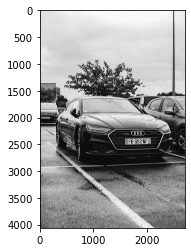

In [7]:
img_1 = cv2.imread(im_1_path)
img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)
plt.imshow(img_1)

# Overlay recognized text on image using OpenCV

In [8]:
def overlay_ocr_text(img_path, save_name):
    '''loads an image, recognizes text, and overlays the text on the image.'''
    
    # loads image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    dpi = 80
    fig_width, fig_height = int(img.shape[0]/dpi), int(img.shape[1]/dpi)
    plt.figure()
    f, axarr = plt.subplots(1,2, figsize=(fig_width, fig_height)) 
    axarr[0].imshow(img)
    
    # recognize text
    result = recognize_text(img_path)

    # if OCR prob is over 0.5, overlay bounding box and text
    for (bbox, text, prob) in result:
        if prob >= 0.5:
            # display 
            print(f'Detected text: {text} (Probability: {prob:.2f})')

            # get top-left and bottom-right bbox vertices
            (top_left, top_right, bottom_right, bottom_left) = bbox
            top_left = (int(top_left[0]), int(top_left[1]))
            bottom_right = (int(bottom_right[0]), int(bottom_right[1]))

            # create a rectangle for bbox display
            cv2.rectangle(img=img, pt1=top_left, pt2=bottom_right, color=(255, 0, 0), thickness=10)

            # put recognized text
            cv2.putText(img=img, text=text, org=(top_left[0], top_left[1] - 10), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(255, 0, 0), thickness=8)
        
    # show and save image
    axarr[1].imshow(img)
    plt.savefig(f'./output/{save_name}_overlay.jpg', bbox_inches='tight')

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


Detected text: FB692-NF (Probability: 0.78)
Detected text: 291 (Probability: 0.91)


<Figure size 432x288 with 0 Axes>

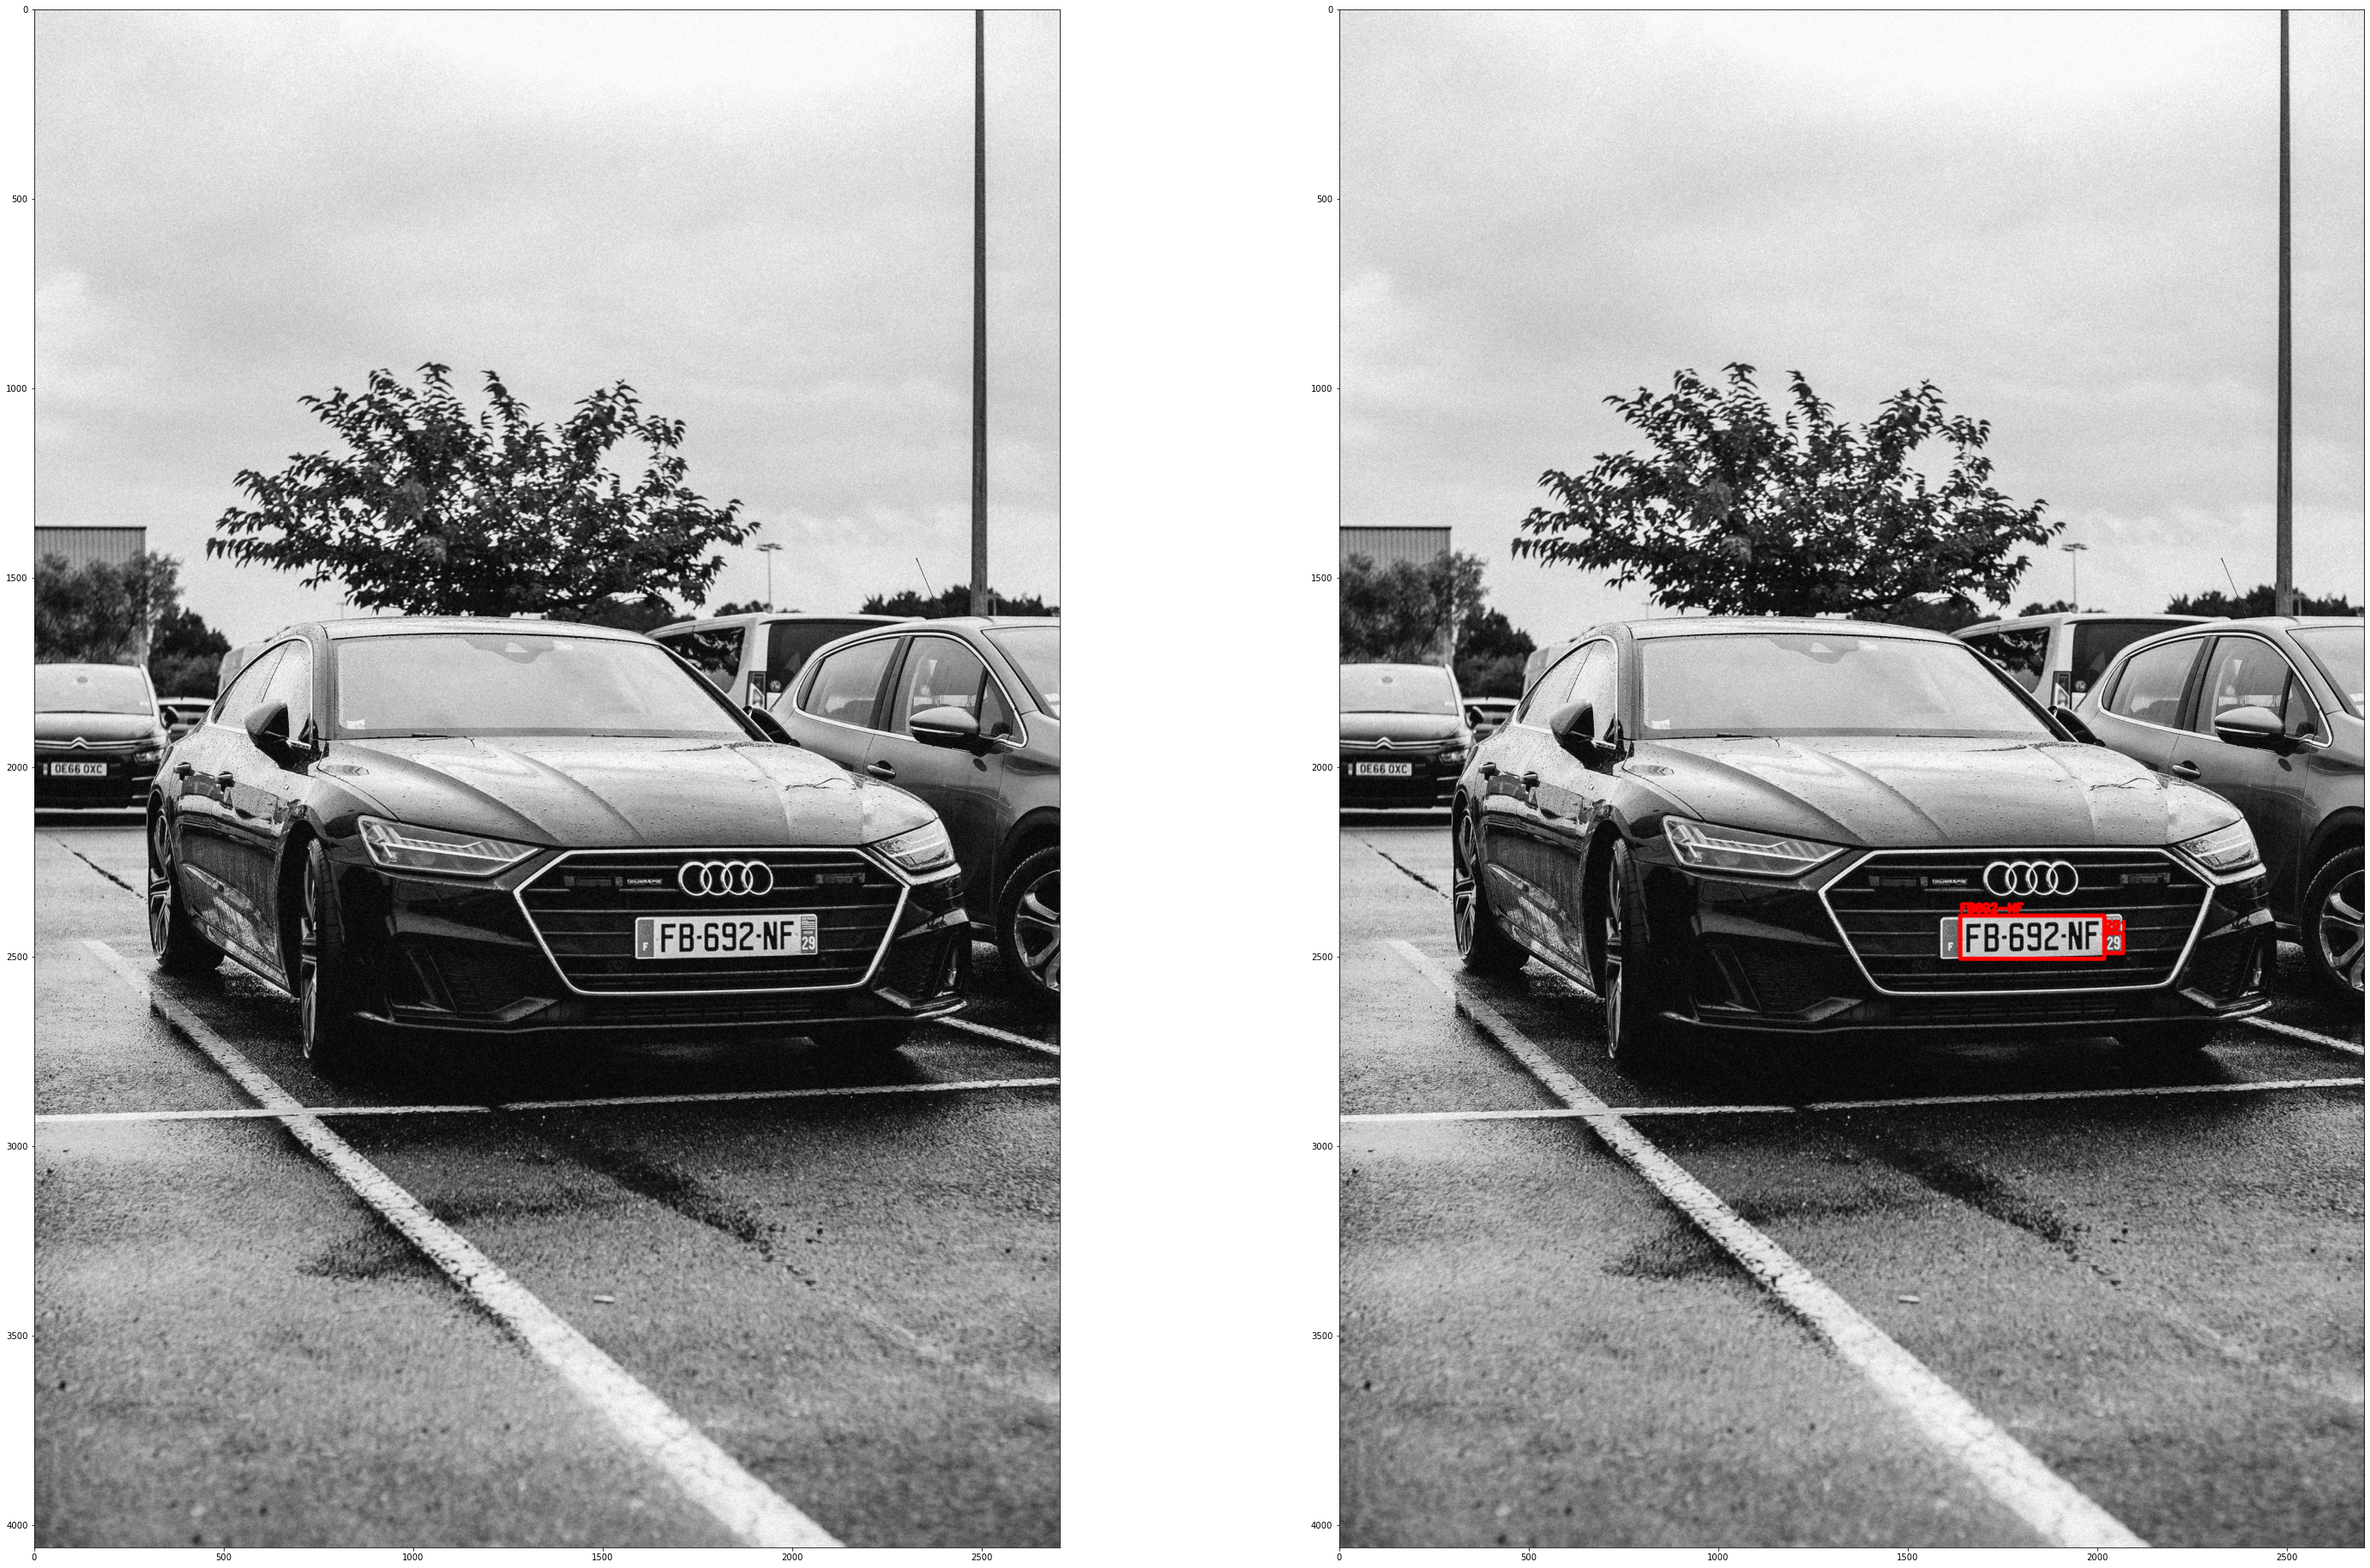

In [9]:
overlay_ocr_text(im_1_path, '1_carplate')